

# 10.分析报告                          

#### 笨办法学 Python 数据分析  / learn data analysis the hard way
- @Author：知行并重


### 数据

以 Titanic 沉船灾难为例。
1912年4月14日 号称“永不沉没”的Titanic号轮船，在她首次航行时，撞击冰山而沉没。我们手上有部分乘客的信息和他们的幸存情况数据。

## 目录

### 数据分析步骤：

1. 理解字段名含义。

2. 分析字段的每个取值的含义,以及变量分布情况。

3. 分析变量与变量之间的相关关系。

4. 揭示业务指标变化规律，并分析背后原因。

5. 通过图表展示和汇报

下面的分析报告，我们也按照这样的方式进行。

### 我们分析的目标：

#### 找出影响Titanic生存率的因素，并量化他们的影响。

### Step1: 导入必要的库

In [8]:
import pandas as pd #数据分析
import numpy as np #科学计算
import matplotlib
import matplotlib.pyplot as plt  # 绘图工具包
import seaborn as sns # 高级绘图工具包

import warnings 

# 使用 ggplot 主题
matplotlib.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings('ignore')

## 一、数据读取

In [9]:
data = pd.read_csv("../input/titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 二、理解变量

对于数据的字段名，一定要有准确的把握，能与实际业务相关联。这是一切分析的基础！

乘客数据取自[官网](https://www.kaggle.com/c/titanic/data). 各字段含义如下：

|字段名|含义|字段类型|取值类型|
|:---|:---|:---|:---|
|PassengerId|乘客ID|离散型|int|
|Survived|**是否幸存（幸存：1 遇难：0）**|离散型|int|
|Pclass|客舱等级（1：一等舱 2：二等舱 3：三等舱）|离散型|int|
|Name|姓名|离散型|str|
|Sex|性别|离散型|str|
|Age|年龄|连续型|int|
|SibSp|在船兄弟姐妹/配偶数|连续型|int|
|Parch|在船父母/子女数|连续型|int|
|Ticket|船票编号|离散型|str|
|Fare|票价|连续型|float|
|Cabin|客舱号|离散型|str|
|Embarked|登船港口|离散型|str|

提出假设：

登船的乘客的
1. `性别` 
2. `年龄`
3. `性别、年龄`   
4. `头衔`  
5. `码头`  
6. `票价` 
7. `仓位`
8. `家庭成员情况` 

与幸存与否之间是否有明显影响

    
注：这里主要 分析变量的分布、以及相关性分析

[泰坦尼克百科](https://baike.baidu.com/item/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7/5677)

### 查看数据信息：

1. 查看数据行数 data.shape
2. 缺失值  data.isnull().sum()/len(data)
3. 变量类型   data.dtypes()
4. 数据表占用大小 sys.getsizeof(data_train) 

In [10]:
# 更直接方式
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


整个数据表共：891行，其中`Age`、`Cabin`以及`Embarked`有缺失值，缺失比例19%、77%、0.2%.

# 二、分析字段的每个取值的含义, 以及变量分布

### 2.0 存活情况 Survived

0 = 遇难, 1 = 幸存

In [17]:
result = data['Survived'].value_counts(dropna=False).sort_index()

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:ylabel='Survived'>

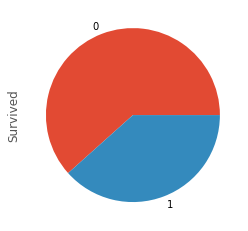

In [18]:
print(result)
result.plot(kind='pie')

##  2.1 登船的乘客的`性别`与幸存与否之间是否有明显差异？

### 2.1.1 性别 Sex 分布

In [19]:
result = data['Sex'].value_counts(dropna=False).sort_index()
result

female    314
male      577
Name: Sex, dtype: int64

### 2.1.2 查看数据中不同性别等级中幸存情况分布

In [20]:
result= pd.crosstab(data['Survived'],data['Sex'],margins =True,normalize="all")
result

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


女性的幸存概率是男性的2.1倍！ 明显高于男性。=> `女性更容易幸存`

## 2.2 登船的乘客的`年龄`与幸存与否之间是否有明显差异？

### 2.2.1 年龄 Age

对年龄分箱处理，离散化。

In [21]:
# 划分为 少年、青年、中年、中老年、老年
cut_points = [0,5,10,15,20,25,30,35,40,45,50,55,60,np.inf]
labels = [0,5,10,15,20,25,30,35,40,45,50,55,60]
data['Age_cut']= pd.cut(data['Age'],cut_points,labels= labels,right =False) #默认右闭


In [22]:
data['Age_cut'].value_counts().sort_index()

0      40
5      22
10     16
15     86
20    114
25    106
30     95
35     72
40     48
45     41
50     32
55     16
60     26
Name: Age_cut, dtype: int64

<AxesSubplot:ylabel='Frequency'>

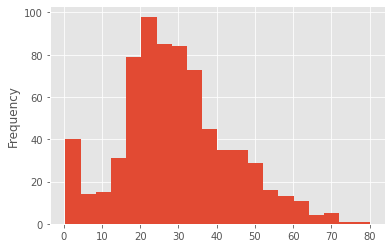

In [23]:
data['Age'].plot(kind='hist',bins=20)

### 2.2.2 不同年龄的存活率情况

In [25]:
result = data[['Age_cut','Survived']].groupby('Age_cut').agg([np.mean,len]).sort_index()
result

Survived     
             mean  len
Age_cut               
0        0.675000   40
5        0.500000   22
10       0.437500   16
15       0.395349   86
20       0.342105  114
25       0.358491  106
30       0.421053   95
35       0.458333   72
40       0.375000   48
45       0.390244   41
50       0.437500   32
55       0.375000   16
60       0.269231   26

<AxesSubplot:xlabel='Age_cut'>

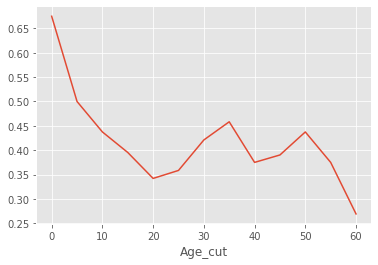

In [26]:
result['Survived']['mean'].plot(kind='line')

<AxesSubplot:label='a0f69aa3-0dcc-4c26-b78f-6a8145f39f7e', xlabel='Age_cut'>

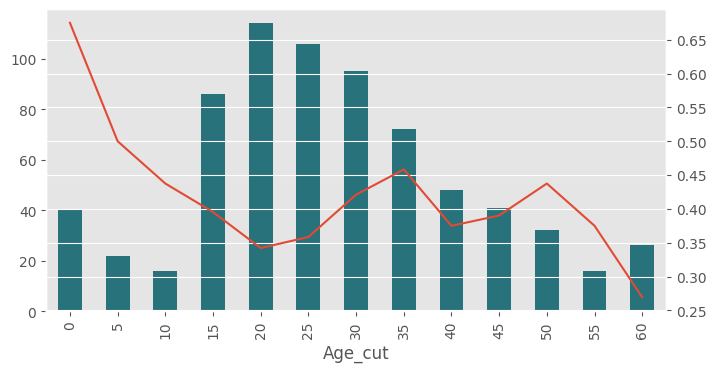

In [27]:
fig, ax1 = plt.subplots(1,1,figsize=(8, 4),dpi=100)
ax2 = ax1.twinx() # 主次坐标轴
result['Survived']['len'].plot(kind='bar',color ='#27727B',grid=False,ax=ax1)
result['Survived']['mean'].plot(kind='line',ax=ax2)

**`结论`** :青年人与老年人的存活率更低！特别是18-30岁间的乘客，幸存的比例较低！


但这部分与性别的关系如何？

## 2.3 登船的乘客的`性别、年龄`与幸存与否之间是否有明显差异？

#### 结合年龄来看


In [30]:
result = data[['Age_cut','Survived','Sex']].groupby(['Age_cut','Sex']).agg(np.mean).unstack().sort_index().T
result

Age_cut                 0         5        10        15        20        25  \
         Sex                                                                  
Survived female  0.705882  0.538462  0.555556  0.805556  0.761905  0.666667   
         male    0.652174  0.444444  0.285714  0.100000  0.097222  0.236842   

Age_cut                30        35        40        45        50        55  \
         Sex                                                                  
Survived female  0.818182  0.851852  0.722222  0.642857  0.916667  0.833333   
         male    0.209677  0.222222  0.166667  0.259259  0.150000  0.100000   

Age_cut                60  
         Sex               
Survived female  1.000000  
         male    0.136364

<AxesSubplot:xlabel='Age_cut'>

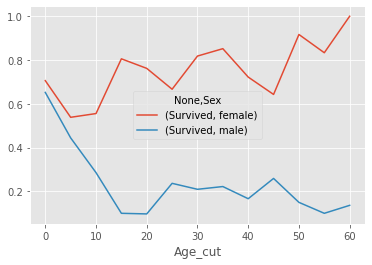

In [31]:
result.T.plot(kind='line')

**`结论`** :成年后的男性，幸存的比例较低！
推测这部分人是由于灾难发生时，男性将救生船留给女性和小孩，并留下救援有关。

**男人不易！**

## 2.4 登船的乘客的`头衔`与幸存与否之间是否有明显差异？

### 2.4.1 头衔 分布

按照之前介绍的处理方式，我们提取 名字中的头衔，并对其进行归纳合并。

In [32]:
import re

def process_name(name):
    result = re.findall("([A-Za-z]+)\.",name)[0]
    return result

In [33]:
data['title'] = data['Name'].apply(lambda x:process_name(x))

In [34]:
#map 替换有多个类型 情况
title_dict = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Countess":   "Royalty",
        "Dona":       "Royalty",
        "Mme":        "Mrs",
        "Mlle":       "Miss",
        "Ms":         "Mrs",
        "Mr" :        "Mr",
        "Mrs" :       "Mrs",
        "Miss" :      "Miss",
        "Master" :    "Master",
        "Lady" :      "Royalty"
}

In [36]:
data['title_new'] = data['title'].map(title_dict)

In [37]:
result = data['title_new'].value_counts(dropna=False)
result

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: title_new, dtype: int64

<AxesSubplot:>

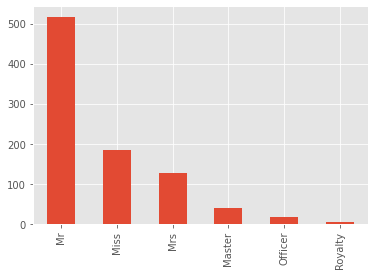

In [38]:
# 绘图
result.plot(kind='bar')

### 2.4.2 不同头衔的存活率情况

In [39]:
result = data[['title_new','Survived']].groupby(['title_new']).agg([np.mean,len])
result

Survived     
               mean  len
title_new               
Master     0.575000   40
Miss       0.701087  184
Mr         0.156673  517
Mrs        0.795276  127
Officer    0.277778   18
Royalty    0.600000    5

<AxesSubplot:label='3eaf6353-9e77-462e-ae96-ec0d60d96124', xlabel='title_new'>

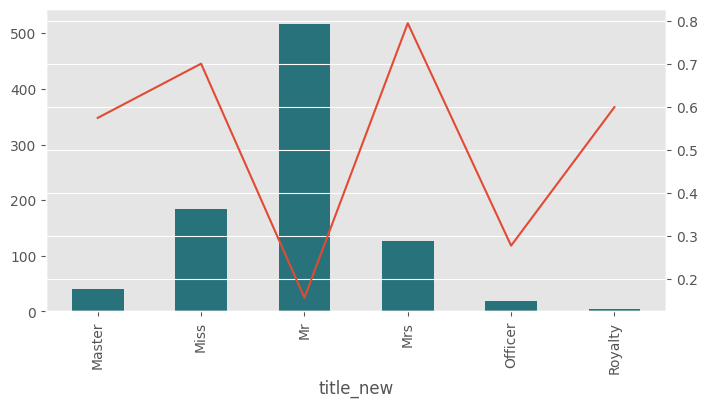

In [41]:
fig, ax1 = plt.subplots(1,1,figsize=(8, 4),dpi=100)
ax2 = ax1.twinx()
result['Survived']['len'].plot(kind='bar',color ='#27727B',grid=False,ax=ax1)
result['Survived']['mean'].plot(kind='line',ax=ax2)

**`结论`** :Mr 普通男性 和 Officer 工作人员 生存概率最低！
生存概率有着这样的顺序： 普通男性 < 工作人员 < 上流人士 < 女性


## 2.5 登船的乘客的`码头`与幸存与否之间是否有明显差异？

### 2.5.1 登船码头 Embarked

登船码头 C = Cherbourg, Q = Queenstown, S = Southampton

![](../pics/embarked.png)

In [42]:
result = data['Embarked'].value_counts(normalize=True)
result 

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

大部分7成的乘客都是从首站 的 Southampton 登船。2成的乘客在第二站 Cherbourg 登船。1成的乘客来自第三站也就是最后一站 Queenstown

### 2.5.2 不同码头的存活率情况

In [43]:
result = data[['Embarked','Survived']].groupby(['Embarked']).agg(np.mean)
result

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**`结论`** : 在第二站 Cherbourg 登船
的乘客生存概率明显高于其他两个码头！

具体原因有待进一步了解！


## 2.6 登船的乘客的`仓位`与幸存与否之间是否有明显差异？

仓位 可以在数据中由两个字段反映：分别是
- 客舱等级 PClass （1，头等舱，2 二等舱 3 三等舱）
- 客舱 Cabin

### 2.6.1 客舱等级 PClass 分布

In [44]:
result = data['Pclass'].value_counts(dropna=False).sort_index()
result

1    216
2    184
3    491
Name: Pclass, dtype: int64

<AxesSubplot:>

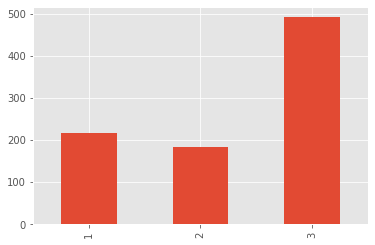

In [45]:
# 绘图
result.plot(kind='bar')

### 2.6.2 客舱等级中幸存情况分布

In [46]:
# 数据形式
result = data.pivot_table(values="Survived",index="Pclass",aggfunc="mean")
# result

<AxesSubplot:xlabel='Pclass'>

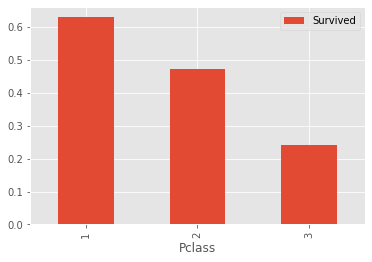

In [47]:
# 绘图形式
result.plot(kind = 'bar')

**`结论`**：随着仓位等级的提高，存活概率越大！=>`头等仓更容易幸存`

### 2.6.3 客舱 Cabin 分布

船的仓位在对应在船的位置分布情况。
- 在船甲板上，有6个房间标记为T、U、W、X、Y、Z，但数据集中只有T舱 
- A、 B舱和C舱只供头等舱乘客使用 
- D和E甲板适用于所有级别 
- F层和G层是为二等舱和三等舱乘客准备的 
- 从A到G，到楼梯的距离增加，这可能是生存的一个因素

船右侧撞击冰山
![](../pics/Cabin.png)

In [51]:
# 从客舱提取所在甲板层，对于缺失值，填充M （Missing）
data['Deck'] = data['Cabin'].fillna("M").apply(lambda x: x[:1])

In [53]:
# 对于 顶层的 T 仓 替换为 A 
data.loc[data['Deck']=='T','Deck'] = "A"

In [54]:
data['Deck'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: Deck, dtype: int64

### 2.6.4 客舱等级与存活率之间关系

In [55]:
data.pivot_table(values="Survived",index="Pclass",columns = 'Deck',aggfunc=len,fill_value="",margins=True)

Deck,A,B,C,D,E,F,G,M,All
Pclass,,,,,,,,,
1,16,47,59,29,25,,,40,216
2,,,,4,4,8,,168,184
3,,,,,3,5,4,479,491
All,16,47,59,33,32,13,4,687,891


In [56]:
data.pivot_table(values="Survived",index="Pclass",columns = 'Deck',aggfunc=np.mean,fill_value="",margins=True)

Deck,A,B,C,D,E,F,G,M,All
Pclass,,,,,,,,,
1,0.4375,0.744681,0.59322,0.758621,0.72,,,0.475,0.62963
2,,,,0.75,0.75,0.875,,0.440476,0.472826
3,,,,,1,0.2,0.5,0.235908,0.242363
All,0.4375,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.299854,0.383838


**`结论`** : 从有记录仓室的乘客的生存率普遍高于整体。

猜测是否是幸存后登记的原因？ 有待进一步明确

## 2.7 登船的乘客的`票价`与幸存与否之间是否有明显差异？

### 2.7.1 乘客的`票价` 分布情况

票价呈现明显的偏态分布情况，即低价票占比较高

In [57]:
cut_points = [0,10,20,30,40,50,60,np.inf]
labels = [0,10,20,30,40,50,60]
data['Fare_cut']= pd.cut(data['Fare'],cut_points,labels= labels,right =False) #默认右闭

In [58]:
data_low = data[data['Fare']<50]  # 低价票

<AxesSubplot:ylabel='Frequency'>

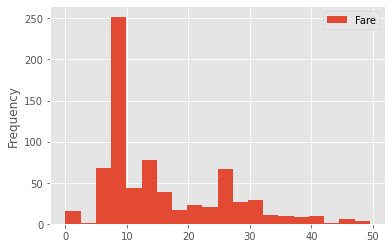

In [61]:
data_low['Fare'].plot(kind='hist',bins=20,legend=True)
# data['Fare'].plot(kind='hist',bins=20,legend=True)
# seaborn 版本
# sns.distplot(data['Fare'])
# sns.distplot??

### 2.7.2 不同票价 生存情况

In [62]:
result = data[['Fare_cut','Survived']].groupby('Fare_cut').agg([np.mean,len]).sort_index()
result

Survived     
              mean  len
Fare_cut               
0         0.199405  336
10        0.424581  179
20        0.426471  136
30        0.437500   64
40        0.266667   15
50        0.692308   39
60        0.672131  122

<AxesSubplot:label='745a8b02-da11-409f-8230-a3e95bbd6f67', xlabel='Fare_cut'>

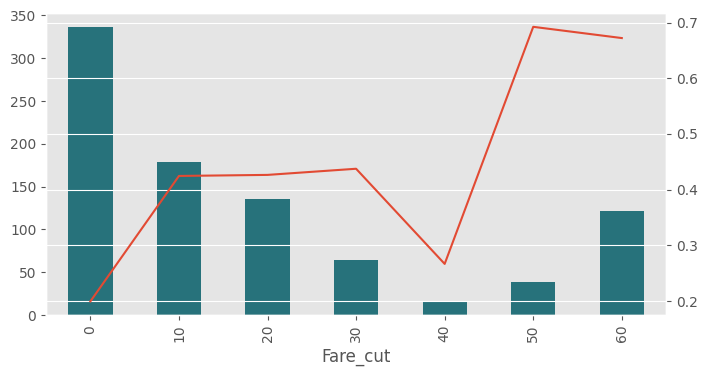

In [64]:
fig, ax1 = plt.subplots(1,1,figsize=(8, 4),dpi=100)
ax2 = ax1.twinx()
result['Survived']['len'].plot(kind='bar',color ='#27727B',grid=False,ax=ax1)
result['Survived']['mean'].plot(kind='line',ax=ax2)

**`结论`** : 购买高价票的乘客，生存概率较高！

票价 一定程度的反映乘客的收入水平，所以推断高收入人群的存活可能性较高！

## 2.8 登船的乘客的`家庭成员情况`与幸存与否之间是否有明显差异？

从前面介绍

- SibSp: 船上兄弟姐妹以及配偶的个数
- Parch: 船上父母以及子女的个数

    家庭成员数量 SibSp + Parch + 1

In [65]:
def change_fun(x,y):
    return x + y + 1

In [66]:
data['family'] = data.apply(lambda x:change_fun(x['Parch'],x['SibSp']),axis = 1)

In [67]:
result = data[['family','Survived']].groupby(['family']).agg([len,np.mean,]).sort_index()
result.index = pd.Series(result.index).apply(str) # 解决坐标轴错位bug
result

Survived          
            len      mean
family                   
1           537  0.303538
2           161  0.552795
3           102  0.578431
4            29  0.724138
5            15  0.200000
6            22  0.136364
7            12  0.333333
8             6  0.000000
11            7  0.000000

In [68]:
# result['Survived']['mean'].plot(kind='line')

<AxesSubplot:label='ae6d0989-4a11-4ac6-827f-d496e8182d71', xlabel='family'>

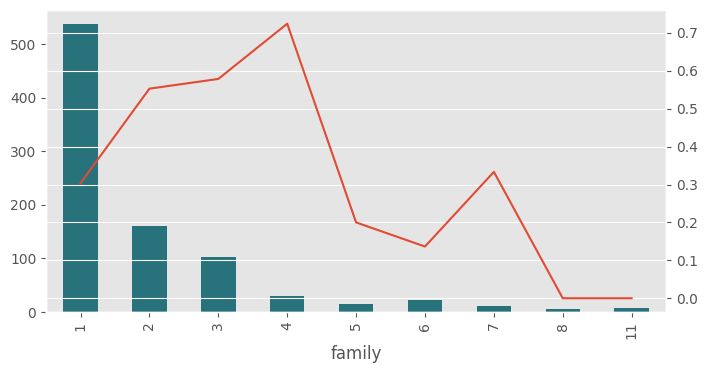

In [69]:
fig, ax1 = plt.subplots(1,1,figsize=(8, 4),dpi=100)
ax2 = ax1.twinx()
result['Survived']['len'].plot(kind='bar',color ='#27727B',grid=False,ax=ax1)
result['Survived']['mean'].plot(kind='line',ax=ax2)

**`结论`** : 随着家庭成员数量的增加并没有使得，生存概率提高！

是不是说亲人之间的相互帮助，耽误了逃生的时间? 亦或者是因为家人的生存，而选择牺牲自己的生命？

## 结论：
**所以一个从第二站 Cherbourg 登船，住头等舱的一家四口中的年轻妈妈和孩子最容易生存下来。**
    ![狗头](../pics/doge.png)

In [70]:
# 【 灾难发生时，你的生存概率有大？】

<h1 style="color:#EE6A50;"> Correlation is not Causation  相关不是因果 </h1>

### 参考资料

1. https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

## 汇报——RISE

数据分析结果汇报 ppt，也可以通过jupyter notebook 实现。

In [133]:
# !pip install RISE
# !jupyter-nbextension install rise --py --sys-prefix

安装包
```
!pip install RISE
!jupyter-nbextension install rise --py --sys-prefix
```
源码仓库
https://github.com/xinetTexLive/RISE

# 谢谢观看

Github 代码：https://github.com/kevin-meng/learn-data-analysis-the-hard-way

![](../pics/thankyou.png)